# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 전처리

In [2]:
df.drop(['CustomerID'], axis=1, inplace=True)  ## CustomerID는 row index가 동일한 기능을 하고 있으므로 필요하지 않아 삭제
df.Gender = pd.get_dummies(df.Gender).Female  ## Male이면 0, Female이면 1
df.columns = [['Gender', 'Age', 'Annual Income', 'Spending Score']]
df 

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


# EDA

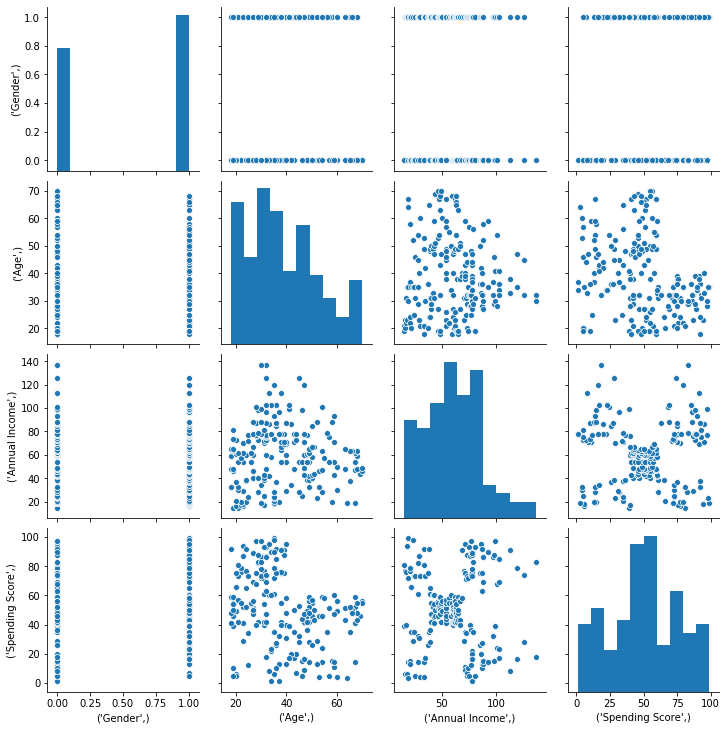

In [3]:
import seaborn as sns

sns.pairplot(df)

연속형 변수간에 특별한 상관관계는 보이지 않고 특별히 한쪽으로 치우쳐있지 않다고 판단하여 scaling은 추후에 필요시 하기로 함.

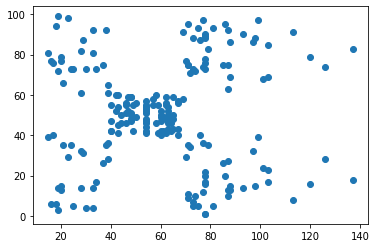

In [4]:
plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.show()

Annual Income과 Spending Score 변수간의 2차원 plot에서 5개의 군집화가 가능할 것으로 보임.

# Agglomerative Hierarchical Clustering

Text(0, 0.5, 'Spending Score')

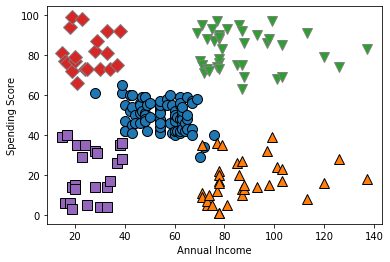

In [5]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
predict = agg.fit_predict(df)
mglearn.discrete_scatter(df.iloc[:,2], df.iloc[:,3], predict)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

5개의 군집으로 clustering이 잘 된 것을 볼 수 있음.

(0.0, 2000.0)


Text(0, 0.5, 'Distance of Clusters')

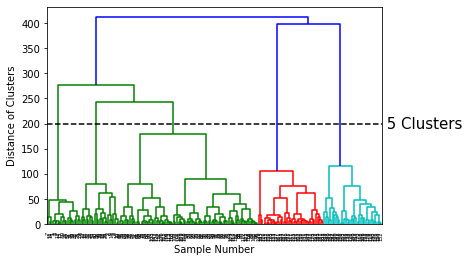

In [6]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(df)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
print(bounds)
ax.plot(bounds, [200,200], '--', c='k')
ax.text(bounds[1], 200, ' 5 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("Sample Number")
plt.ylabel("Distance of Clusters")

# K-means Clustering

Text(0, 0.5, 'Spending Score')

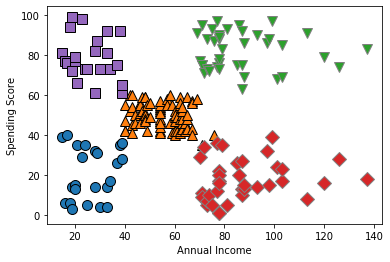

In [7]:
from sklearn.cluster import KMeans

predict = KMeans(n_clusters=5, random_state=0).fit_predict(df)
mglearn.discrete_scatter(df.iloc[:,2], df.iloc[:,3], predict)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Agglomerative보다도 조금 더 clustering이 잘 된 것을 확인할 수 있음.

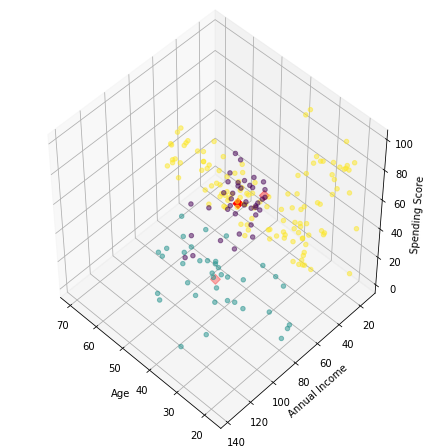

In [8]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(df)
centers = pd.DataFrame(model.cluster_centers_, columns=df.columns)
center_x = centers[['Age']]
center_y = centers[['Annual Income']]
center_z = centers[['Spending Score']]

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df[['Age']],df[['Annual Income']],df[['Spending Score']],c=model.predict(df),alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

세 개의 변수로 시각화하여 clustering이 잘 되었는지 보는 것보다 두 개의 변수로 시각화하여 확인하는 것이 더 선명함.

Text(0.5, 1.0, 'Elbow curve')

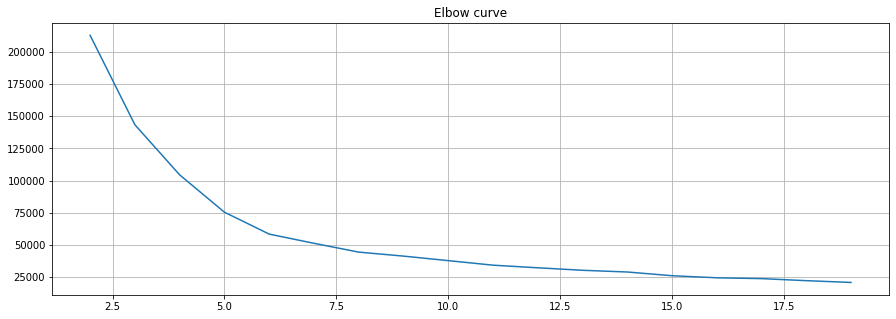

In [9]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Elbow Point로 보았을 때도 군집의 수는 5가 적절함.

# DBSCAN

Text(0, 0.5, 'Spending Score')

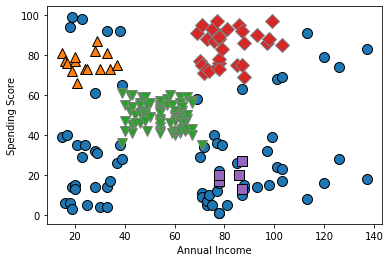

In [10]:
from sklearn.cluster import DBSCAN

predict = DBSCAN(eps=10, min_samples=5).fit_predict(df)
mglearn.discrete_scatter(df.iloc[:,2], df.iloc[:,3], predict)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

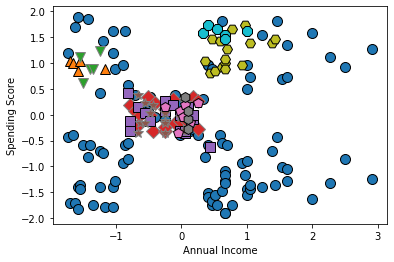

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

predict = DBSCAN().fit_predict(df_scaled)
mglearn.discrete_scatter(df_scaled[:,2], df_scaled[:,3], predict)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

DBSCAN의 경우 앞의 두 모델에 비해 현저하게 clustering 성능이 떨어지는 것을 확인할 수 있음. scaling을 하면 오히려 성능이 더 떨어지고 eps와 min_samples를 다양하게 바꿔보아도 이게 최선이라고 판단함.
DBSCAN 모델 측면에서는 Noise Point로 인식되는 데이터가 많음.

# Mean-shift Clustering

Text(0, 0.5, 'Spending Score')

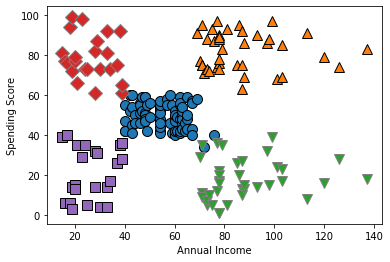

In [12]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=25).fit(df)
predict = ms.labels_
mglearn.discrete_scatter(df.iloc[:,2], df.iloc[:,3], predict)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

K-means와 비슷하게 좋은 성능을 보임. 이 데이터는 중심 기반의 clustering이 잘 맞는다는 것을 확인 가능함.

# Clustering 결과 비교

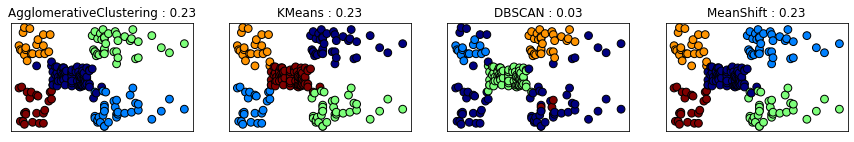

In [13]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 2),
                         subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [AgglomerativeClustering(n_clusters=5), KMeans(n_clusters=5), DBSCAN(eps=10, min_samples=5), MeanShift(bandwidth=25)]

for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(df)
    ax.scatter(df.iloc[:, 2], df.iloc[:, 3], c=clusters, cmap='jet',
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(df_scaled, clusters)))